<a href="https://colab.research.google.com/github/sandesarikeerthi/ADM-LAB/blob/main/ADMLAB_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

In [3]:
file_path = '/mnt/data/archive.csv'
data = pd.read_csv('/content/archive.csv')

In [4]:
# Preprocessing: Selecting and cleaning relevant columns
columns_to_use = ['discounted_price', 'actual_price', 'rating', 'rating_count']
for col in ['discounted_price', 'actual_price', 'rating_count']:
    data[col] = data[col].replace('[^0-9.]', '', regex=True).replace('', '0').astype(float)
    data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

In [5]:
# Drop rows with missing or invalid values
data_cleaned = data[columns_to_use].dropna()

In [6]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

In [7]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans_labels = kmeans.fit_predict(data_scaled)

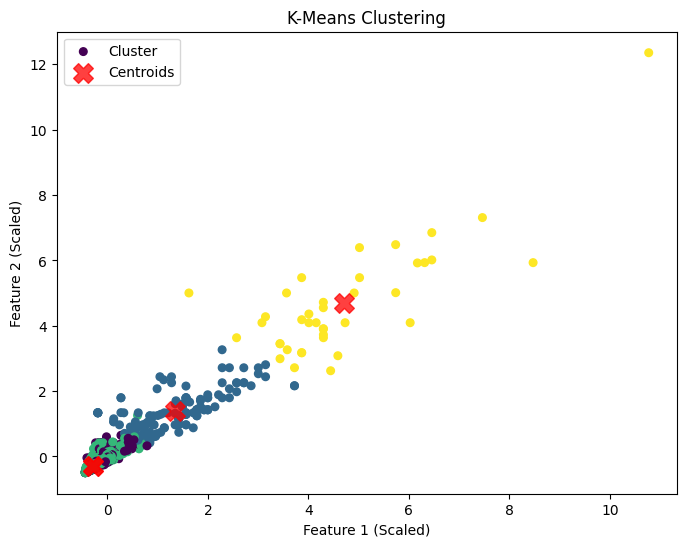

In [8]:
# Visualize K-Means clustering results
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=30, label='Cluster')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.legend()
plt.show()

In [9]:
# Compute linkage matrix using Ward's method
linkage_matrix = linkage(data_scaled, method='ward')

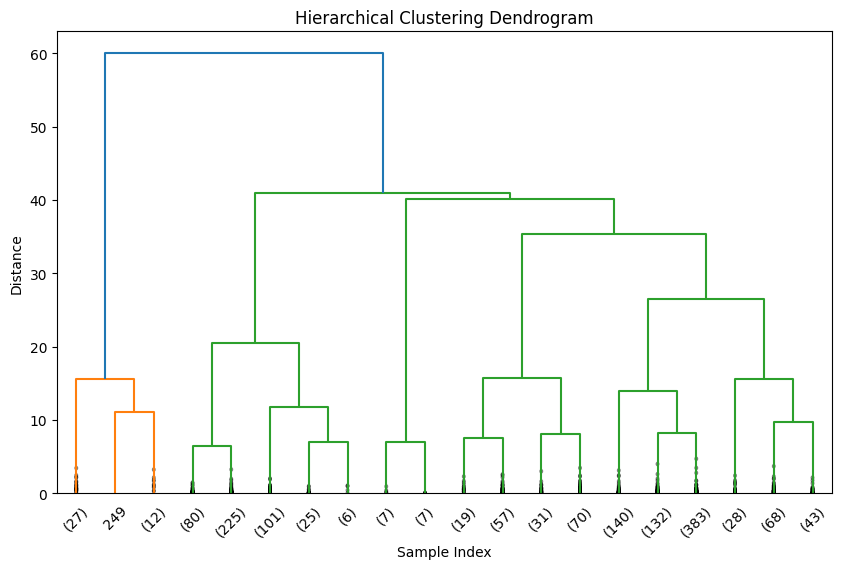

In [10]:
# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=20, leaf_rotation=45., leaf_font_size=10., show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [11]:
# Extract clusters from hierarchical clustering
num_clusters = 4
hierarchical_labels = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

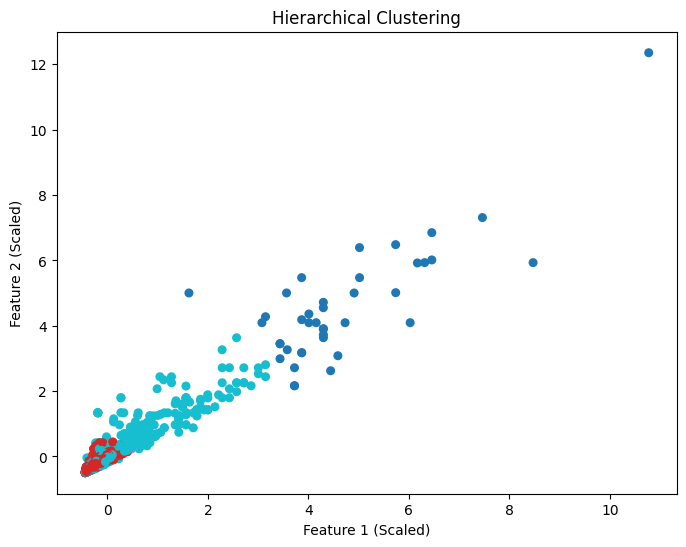

In [12]:
#Visualize Hierarchical clustering results
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=hierarchical_labels, cmap='tab10', s=30)
plt.title("Hierarchical Clustering")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.show()